In [132]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re
import nltk
import spacy

from nltk import ngrams
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
# Downloads

nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Todor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Todor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Todor\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Todor\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Exercise 1: Text Cleaning and Normalization

## Agenda:

I. Text Preprocessing

1. Loading the raw text
2. Converting text to lowercase
3. Removing special characters, numbers, and punctuation
4. Tokenization (splitting text into words or sentences)
5. Stopword removal
6. Stemming
7. Lemmatization
- with NLTK
- with Spacy

II. Text analysis

8. Word Frequency distribution
9. Bigram and Trigram Analysis
10. TF-IDF Calculation

### I. Text Preprocessing

#### 1. Loading the raw text

In [2]:
# Loading the text file

with open("BJJ.txt", "r", encoding="utf-8") as file:
    text = file.read()

In [3]:
#Printing 1000 characters to check if it was loaded

print(text[500:1000])

JJ, Gracie jiu-jitsu, gi/nogi jiu-jitsu, submission grappling
Portuguese name:
Jiu-jitsu brasileiro
Japanese name:
Burajirian jūjutsu (ブラジリアン柔術)
Focus	Ground fighting, submission grappling
Hardness	Full contact
Country of origin	Brazil
Creator	Mataemon Tanabe, Senjuro Kataoka, Taro Miyake, Yukio Tani, Sada Miyako, Geo Omori, Mitsuyo Maeda, Takeo Yano, Soshihiro Satake, Tokugoro Ito, Jacintho Ferro,[1] Donato Pires dos Reis,[1] Hélio Gracie, Carlos Gracie, George Gracie, Oswaldo Gracie, Luiz Fran


#### 2. Converting text to lowercase

In [4]:
lowercase_text = text.lower()
print(lowercase_text[500:1000])

jj, gracie jiu-jitsu, gi/nogi jiu-jitsu, submission grappling
portuguese name:
jiu-jitsu brasileiro
japanese name:
burajirian jūjutsu (ブラジリアン柔術)
focus	ground fighting, submission grappling
hardness	full contact
country of origin	brazil
creator	mataemon tanabe, senjuro kataoka, taro miyake, yukio tani, sada miyako, geo omori, mitsuyo maeda, takeo yano, soshihiro satake, tokugoro ito, jacintho ferro,[1] donato pires dos reis,[1] hélio gracie, carlos gracie, george gracie, oswaldo gracie, luiz fran


#### 3. Removing special characters, numbers, and punctuation

In [100]:
cleaned_text = re.sub(r"[^a-zA-Z\s]", "", lowercase_text)
print(cleaned_text[500:1000])

jiujitsu submission grappling
portuguese name
jiujitsu brasileiro
japanese name
burajirian jjutsu 
focus	ground fighting submission grappling
hardness	full contact
country of origin	brazil
creator	mataemon tanabe senjuro kataoka taro miyake yukio tani sada miyako geo omori mitsuyo maeda takeo yano soshihiro satake tokugoro ito jacintho ferro donato pires dos reis hlio gracie carlos gracie george gracie oswaldo gracie luiz frana oswaldo fadda
famous practitioners	see full list
parenthood	kodokan 


#### 4. Tokenization

In [101]:
# Word Tokenization
words = nltk.word_tokenize(cleaned_text)
print(words[0:50])

['brazilian', 'jiujitsu', 'article', 'talk', 'read', 'edit', 'view', 'history', 'tools', 'appearance', 'hide', 'text', 'small', 'standard', 'large', 'width', 'standard', 'wide', 'color', 'beta', 'automatic', 'light', 'dark', 'from', 'wikipedia', 'the', 'free', 'encyclopedia', 'bjj', 'redirects', 'here', 'for', 'other', 'uses', 'see', 'bjj', 'disambiguation', 'gracie', 'jiujitsu', 'redirects', 'here', 'for', 'the', 'book', 'by', 'helio', 'gracie', 'see', 'gracie', 'jiujitsu']


In [102]:
# Sentences Tokenization
sentences = nltk.sent_tokenize(cleaned_text)
print(sentences)

['brazilian jiujitsu\n\narticle\ntalk\nread\nedit\nview history\n\ntools\nappearance hide\ntext\n\nsmall\n\nstandard\n\nlarge\nwidth\n\nstandard\n\nwide\ncolor beta\n\nautomatic\n\nlight\n\ndark\nfrom wikipedia the free encyclopedia\nbjj redirects here for other uses see bjj disambiguation\ngracie jiujitsu redirects here for the book by helio gracie see gracie jiujitsu book\nbrazilian jiujitsu\n\nromulo barral attempting a triangle choke on gabriel vella at the  world jiujitsu championship\nalso known as\tbjj gracie jiujitsu ginogi jiujitsu submission grappling\nportuguese name\njiujitsu brasileiro\njapanese name\nburajirian jjutsu \nfocus\tground fighting submission grappling\nhardness\tfull contact\ncountry of origin\tbrazil\ncreator\tmataemon tanabe senjuro kataoka taro miyake yukio tani sada miyako geo omori mitsuyo maeda takeo yano soshihiro satake tokugoro ito jacintho ferro donato pires dos reis hlio gracie carlos gracie george gracie oswaldo gracie luiz frana oswaldo fadda\nfam

#### 5. Stopword Removal

In [103]:
# Initialize the stop words - English language

stop_words = set(stopwords.words("english"))
print(stop_words)

{'am', 'haven', 'won', "it's", 'don', 'our', "weren't", "you'll", 'its', 'how', "haven't", "hasn't", 'just', 'theirs', 'being', 'o', 'shouldn', "you're", 'yours', "wouldn't", 'myself', 'very', 'once', "hadn't", 'down', 'your', 'during', 'ourselves', 'for', 'are', 'off', 'to', 'hers', 'their', 'is', "shouldn't", 'all', "didn't", 'out', 'there', 'y', 'you', 'whom', 'between', 'she', 'have', 'same', 'what', 'him', 'was', 'needn', 'had', 'own', 'can', 'too', 'any', 'the', 'those', 'couldn', 'them', 'm', 're', 't', 'herself', 'until', "mightn't", 'me', 'as', 'but', 'her', 'more', 'here', 'll', "isn't", "couldn't", 'himself', 'ours', 'who', 'up', 'through', 'ma', 've', 'under', 'of', 'with', 'we', 'not', 'that', 'an', 'ain', 'if', 'about', 'why', 'such', "aren't", "needn't", 'itself', "won't", 'each', 'he', 'hasn', 'be', "you'd", 'below', 's', "she's", 'now', 'themselves', 'nor', 'or', 'into', 'mustn', 'i', "wasn't", 'than', 'after', 'in', 'having', 'will', 'mightn', 'his', 'it', 'didn', 'fr

In [104]:
# Removing the stop words from the text

filtered_words = [word for word in words if word not in stop_words]
print(filtered_words[:100])

['brazilian', 'jiujitsu', 'article', 'talk', 'read', 'edit', 'view', 'history', 'tools', 'appearance', 'hide', 'text', 'small', 'standard', 'large', 'width', 'standard', 'wide', 'color', 'beta', 'automatic', 'light', 'dark', 'wikipedia', 'free', 'encyclopedia', 'bjj', 'redirects', 'uses', 'see', 'bjj', 'disambiguation', 'gracie', 'jiujitsu', 'redirects', 'book', 'helio', 'gracie', 'see', 'gracie', 'jiujitsu', 'book', 'brazilian', 'jiujitsu', 'romulo', 'barral', 'attempting', 'triangle', 'choke', 'gabriel', 'vella', 'world', 'jiujitsu', 'championship', 'also', 'known', 'bjj', 'gracie', 'jiujitsu', 'ginogi', 'jiujitsu', 'submission', 'grappling', 'portuguese', 'name', 'jiujitsu', 'brasileiro', 'japanese', 'name', 'burajirian', 'jjutsu', 'focus', 'ground', 'fighting', 'submission', 'grappling', 'hardness', 'full', 'contact', 'country', 'origin', 'brazil', 'creator', 'mataemon', 'tanabe', 'senjuro', 'kataoka', 'taro', 'miyake', 'yukio', 'tani', 'sada', 'miyako', 'geo', 'omori', 'mitsuyo', 

#### 6. Stemming

In [105]:
# Initialize the Stemmer

stemmer = PorterStemmer()

In [106]:
# Stemming the words in filtered_words

stemmed_words = [stemmer.stem(word) for word in filtered_words]
print(stemmed_words[:100])

['brazilian', 'jiujitsu', 'articl', 'talk', 'read', 'edit', 'view', 'histori', 'tool', 'appear', 'hide', 'text', 'small', 'standard', 'larg', 'width', 'standard', 'wide', 'color', 'beta', 'automat', 'light', 'dark', 'wikipedia', 'free', 'encyclopedia', 'bjj', 'redirect', 'use', 'see', 'bjj', 'disambigu', 'graci', 'jiujitsu', 'redirect', 'book', 'helio', 'graci', 'see', 'graci', 'jiujitsu', 'book', 'brazilian', 'jiujitsu', 'romulo', 'barral', 'attempt', 'triangl', 'choke', 'gabriel', 'vella', 'world', 'jiujitsu', 'championship', 'also', 'known', 'bjj', 'graci', 'jiujitsu', 'ginogi', 'jiujitsu', 'submiss', 'grappl', 'portugues', 'name', 'jiujitsu', 'brasileiro', 'japanes', 'name', 'burajirian', 'jjutsu', 'focu', 'ground', 'fight', 'submiss', 'grappl', 'hard', 'full', 'contact', 'countri', 'origin', 'brazil', 'creator', 'mataemon', 'tanab', 'senjuro', 'kataoka', 'taro', 'miyak', 'yukio', 'tani', 'sada', 'miyako', 'geo', 'omori', 'mitsuyo', 'maeda', 'takeo', 'yano', 'soshihiro']


#### Lemmatization

##### Lemmatization with NLTK

In [107]:
# Initialize the Lemmatizer

lemmatizer = WordNetLemmatizer()

In [108]:
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
print(lemmatized_words[0:100])

['brazilian', 'jiujitsu', 'article', 'talk', 'read', 'edit', 'view', 'history', 'tool', 'appearance', 'hide', 'text', 'small', 'standard', 'large', 'width', 'standard', 'wide', 'color', 'beta', 'automatic', 'light', 'dark', 'wikipedia', 'free', 'encyclopedia', 'bjj', 'redirects', 'us', 'see', 'bjj', 'disambiguation', 'gracie', 'jiujitsu', 'redirects', 'book', 'helio', 'gracie', 'see', 'gracie', 'jiujitsu', 'book', 'brazilian', 'jiujitsu', 'romulo', 'barral', 'attempting', 'triangle', 'choke', 'gabriel', 'vella', 'world', 'jiujitsu', 'championship', 'also', 'known', 'bjj', 'gracie', 'jiujitsu', 'ginogi', 'jiujitsu', 'submission', 'grappling', 'portuguese', 'name', 'jiujitsu', 'brasileiro', 'japanese', 'name', 'burajirian', 'jjutsu', 'focus', 'ground', 'fighting', 'submission', 'grappling', 'hardness', 'full', 'contact', 'country', 'origin', 'brazil', 'creator', 'mataemon', 'tanabe', 'senjuro', 'kataoka', 'taro', 'miyake', 'yukio', 'tani', 'sada', 'miyako', 'geo', 'omori', 'mitsuyo', 'ma

##### Lemmatization with spacy

In [109]:
# Download the spacy package

!pip install spacy

In [110]:
# Downloading the english model

!python -m spacy download en_core_web_sm

     --------------------------------------- 12.8/12.8 MB 16.8 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [111]:
# Loading the english model and the cleaned text as input

nlp = spacy.load("en_core_web_sm")
document = nlp(cleaned_text)

In [112]:
lemmatized_words_spacy = [token.text for token in document if token.text not in stop_words and token.is_alpha]
print(lemmatized_words_spacy[:100])

['brazilian', 'jiujitsu', 'article', 'talk', 'read', 'edit', 'view', 'history', 'tools', 'appearance', 'hide', 'text', 'small', 'standard', 'large', 'width', 'standard', 'wide', 'color', 'beta', 'automatic', 'light', 'dark', 'wikipedia', 'free', 'encyclopedia', 'bjj', 'redirects', 'uses', 'see', 'bjj', 'disambiguation', 'gracie', 'jiujitsu', 'redirects', 'book', 'helio', 'gracie', 'see', 'gracie', 'jiujitsu', 'book', 'brazilian', 'jiujitsu', 'romulo', 'barral', 'attempting', 'triangle', 'choke', 'gabriel', 'vella', 'world', 'jiujitsu', 'championship', 'also', 'known', 'bjj', 'gracie', 'jiujitsu', 'ginogi', 'jiujitsu', 'submission', 'grappling', 'portuguese', 'name', 'jiujitsu', 'brasileiro', 'japanese', 'name', 'burajirian', 'jjutsu', 'focus', 'ground', 'fighting', 'submission', 'grappling', 'hardness', 'full', 'contact', 'country', 'origin', 'brazil', 'creator', 'mataemon', 'tanabe', 'senjuro', 'kataoka', 'taro', 'miyake', 'yukio', 'tani', 'sada', 'miyako', 'geo', 'omori', 'mitsuyo', 

### Text Analysis

#### 8. Word Frequency Distribution

In [113]:
word_counts = Counter(lemmatized_words)
common_words = word_counts.most_common(20)
print(common_words)

[('jiujitsu', 96), ('gracie', 57), ('opponent', 53), ('position', 51), ('bjj', 47), ('guard', 46), ('brazilian', 45), ('submission', 38), ('choke', 37), ('lock', 34), ('kg', 30), ('lb', 30), ('practitioner', 29), ('judo', 29), ('injury', 29), ('technique', 27), ('tournament', 27), ('ground', 26), ('art', 25), ('grappling', 24)]


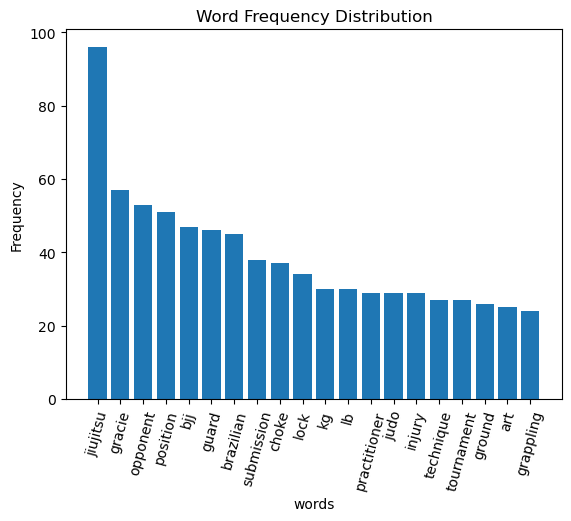

In [122]:
plt.bar(*zip(*common_words))

plt.xticks(rotation=75)
plt.title("Word Frequency Distribution")
plt.xlabel("words")
plt.ylabel("Frequency")

plt.show()

#### 9. Bigram and Trigram Analysis

In [128]:
# Creating the bi- and trigrams

bigrams = list(ngrams(lemmatized_words, 2))
trigrams = list(ngrams(lemmatized_words, 3))

# Counting the frequency

bigram_freq = Counter(bigrams)
trigram_freq = Counter(trigrams)

In [129]:
# 10 most common bi- and trigrams

common_bigrams = bigram_freq.most_common(10)
common_trigrams = trigram_freq.most_common(10)

In [130]:
print(common_bigrams)

[(('brazilian', 'jiujitsu'), 41), (('kg', 'lb'), 30), (('lb', 'kg'), 22), (('martial', 'art'), 16), (('joint', 'lock'), 14), (('gracie', 'jiujitsu'), 12), (('side', 'control'), 12), (('main', 'article'), 9), (('ground', 'fighting'), 8), (('black', 'belt'), 8)]


In [131]:
print(common_trigrams)

[(('kg', 'lb', 'kg'), 22), (('lb', 'kg', 'lb'), 22), (('international', 'brazilian', 'jiujitsu'), 4), (('brazilian', 'jiujitsu', 'federation'), 4), (('knee', 'belly', 'position'), 4), (('de', 'la', 'riva'), 4), (('open', 'weight', 'division'), 4), (('jiujitsu', 'federation', 'ibjjf'), 3), (('ultimate', 'fighting', 'championship'), 3), (('list', 'brazilian', 'jiujitsu'), 3)]


#### 10. TF-IDF Calculation

In [133]:
# Initialize the Tf-IDF Vectorizer

tfidf = TfidfVectorizer(max_features = 1000, stop_words="english")

In [137]:
# Converting the list (lemmatized words) into a text

tfidf_matrix = tfidf.fit_transform([" ".join(lemmatized_words)])

In [142]:
# Extracting te feature names and the tfidf scores

feature_names = tfidf.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray().flatten()

In [159]:
# Getting the top 10 words by tf-idf score

top_tfidf_words = sorted(zip(feature_names, tfidf_scores), key = lambda x:x[1], reverse=True)
print(top_tfidf_words[:10])

[('jiujitsu', 0.4255626864081051), ('gracie', 0.2526778450548124), ('opponent', 0.2349460664544747), ('position', 0.22608017715430584), ('bjj', 0.2083483985539681), ('guard', 0.2039154539038837), ('brazilian', 0.19948250925379926), ('submission', 0.16845189670320826), ('choke', 0.16401895205312383), ('lock', 0.15072011810287056)]
